# Problématique

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.  Je souhaite y participer et proposer une idée d’application.

# Application proposée

Nous proposons une application "Nutri-grade finder",permettant à partir d'un Scan du Code à Barres, de trouver le nutriscore-grade des produits. Avec cette application, l'utilisateur pourra trouver le nutriscore-grade des produits qui manquent de cette information sur leurs emballages. 

#  Nettoyage du jeu de données "Open Food Facts"

Le jeu de données est téléchargeable sur le site Open Food Facts : On a téléchargé le format CSV. Lors du téléchargement, le jeu de données est assez important (environ 7Go).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import missingno as msno   # identifier et visualiser les données manquantes
import warnings
warnings.filterwarnings("ignore") # éviter d'afficher les alertes pythons 



filename = 'en.openfoodfacts.org.products.csv'

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

 ## Chargement des données

Vu la taille importante du fichier csv, on a décider de charger les colonnes les mieux rempli 

In [3]:
# le chargement  des colonnes les mieux rempli du jeux de donnée .

# nombre de lignes à charger en même temps en mémoire
chunksize = 10 ** 4

nan_rates = []
for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
    nan_rates.append(chunk.isna().mean(axis=0))
    
# moyenne des taux de remplissage des chunks
inds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)
cols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()
df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)


In [4]:
# on affiche la liste des colonnes . 
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_analysis_tags', 'additives_n', 'nutriscore_score',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'food_groups',
       'food_groups_tags', 'food_groups_en', 'states', 'states_tags',
       'states_en', 'ecoscore_grade', 'nutrient_levels_tags', 'completeness',
       'last_image_t', 'last_image_datetime', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object'

In [5]:
#vérification des variables pertinantes; dont on n'a pas besoin pour la suite de l'analyse
columns_to_keep = ['code', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_analysis_tags', 'additives_n', 'nutriscore_score',
       'nutriscore_grade', 'nutrition-score-fr_100g', 'pnns_groups_1', 'pnns_groups_2', 'food_groups',
       'food_groups_tags', 'food_groups_en', 'states', 'states_tags',
       'states_en', 'ecoscore_grade', 'nutrient_levels_tags', 'completeness',
       'main_category','main_category_en', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','sodium_100g']

In [6]:
print('le nombre des colonnes qui reste à exploiter est : ',len(columns_to_keep))

le nombre des colonnes qui reste à exploiter est :  39


In [7]:
# recharger le dataframe avec les variables pertinantes uniquement pour libérer la RAM.

df = pd.read_csv(filename, sep='\t', usecols=columns_to_keep)

In [8]:
def nbr_ligne_colonne(data):
    print('Nombre de lignes restants = ',data.shape[0])
    print('Nombre de colonnes restants = ',data.shape[1])

In [9]:
nbr_ligne_colonne(df)

Nombre de lignes restants =  2679997
Nombre de colonnes restants =  39


## Filtrage des variables pertinente

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679997 entries, 0 to 2679996
Data columns (total 39 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   code                       object 
 1   product_name               object 
 2   brands                     object 
 3   brands_tags                object 
 4   categories                 object 
 5   categories_tags            object 
 6   categories_en              object 
 7   countries                  object 
 8   countries_tags             object 
 9   countries_en               object 
 10  ingredients_text           object 
 11  ingredients_analysis_tags  object 
 12  additives_n                float64
 13  nutriscore_score           float64
 14  nutriscore_grade           object 
 15  pnns_groups_1              object 
 16  pnns_groups_2              object 
 17  food_groups                object 
 18  food_groups_tags           object 
 19  food_groups_en             object 
 20  st

In [11]:
# Exploration des variables doublées et sélectioner les variables les plus pertinentes. 

#df[['brands','brands_tags']].isna().mean(axis=0)
#df[['categories', 'categories_tags', 'categories_en']]['categories'].unique()
#df[[ 'countries', 'countries_tags', 'countries_en']]['countries_en'].value_counts()
#df[['ingredients_text','ingredients_analysis_tags']]
#df[['nutriscore_score', 'nutrition-score-fr_100g']].value_counts()
#df[['food_groups','food_groups_tags', 'food_groups_en']]['food_groups_en'].value_counts()
#df[['states', 'states_tags','states_en']]
#df[['main_category','main_category_en']]['main_category'].value_counts() 

#df[[]]

In [12]:
cols_to_remove = ['brands_tags','categories_tags', 'categories_en','countries', 'countries_tags','nutrition-score-fr_100g','food_groups_tags', 'food_groups_en','states', 'states_tags','states_en','main_category']

In [13]:
# supprimer les variables doublées 

df = df.drop(cols_to_remove, axis=1)

In [14]:
nbr_ligne_colonne(df)

Nombre de lignes restants =  2679997
Nombre de colonnes restants =  27


In [15]:
pd.options.display.float_format = '{:.5f}'.format
df.isna().mean(axis=0)

code                        0.00000
product_name                0.03523
brands                      0.50866
categories                  0.58692
countries_en                0.00273
ingredients_text            0.69994
ingredients_analysis_tags   0.68356
additives_n                 0.69994
nutriscore_score            0.68376
nutriscore_grade            0.68376
pnns_groups_1               0.00026
pnns_groups_2               0.00026
food_groups                 0.66526
ecoscore_grade              0.00042
nutrient_levels_tags        0.64745
completeness                0.00000
main_category_en            0.58692
energy-kcal_100g            0.22463
energy_100g                 0.20700
fat_100g                    0.21188
saturated-fat_100g          0.22777
carbohydrates_100g          0.21187
sugars_100g                 0.21793
fiber_100g                  0.66529
proteins_100g               0.21112
salt_100g                   0.29212
sodium_100g                 0.29212
dtype: float64

In [16]:
data = df[['nutriscore_score','nutriscore_grade']]

In [17]:
data[~data.isnull().all(axis=1)].isna().mean(axis=0)

nutriscore_score   0.00000
nutriscore_grade   0.00000
dtype: float64

## Vérification de la présence de doublons

In [18]:
# supprimer les doublons en utilisant le code bar
print('le nombre des lignes en doublons selon le code-barre est:',df.duplicated('code').sum())

le nombre des lignes en doublons selon le code-barre est: 388


In [19]:
# on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
df['NB_NAN'] = df.isna().sum(axis=1)
# trie des lignes en fonction du nombre de valeurs manquantes
df = df.sort_values('NB_NAN')

In [20]:
len_df = len(df)

In [21]:
# suppression des duplicatas en gardant les versions les mieux remplies
df = df.drop_duplicates('code', keep='first')
# on supprime la colonne qui n'est plus utile
df = df.drop('NB_NAN', axis=1)

In [22]:
# suppression de la variable code qui n'est plus utile. 
df = df.drop('code', axis=1)


In [23]:
nbr_ligne_colonne(df)

Nombre de lignes restants =  2679609
Nombre de colonnes restants =  26


Passons en minuscules toutes les modalités qualitatives nominales, pour supprimer les lignes doublons identiques. 

In [24]:
col_qualitative = ['product_name', "brands","categories","countries_en","ingredients_text","ingredients_analysis_tags", "pnns_groups_1", "pnns_groups_2", "nutriscore_grade","ecoscore_grade","food_groups","nutrient_levels_tags","main_category_en"]

In [25]:
for col in col_qualitative :
    df[col] = df[col].str.lower()

In [26]:
print(f"Nombre de doublons identique: {df[df.duplicated() == True].shape[0]}")

Nombre de doublons identique: 158324


In [27]:
df_cleaned = df.drop_duplicates()

In [28]:
nbr_ligne_colonne(df_cleaned)

Nombre de lignes restants =  2521285
Nombre de colonnes restants =  26


In [29]:
del df

## Traitement des outliers

In [30]:
df_cleaned.describe()

,additives_n,nutriscore_score,completeness,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,795474.00000,830848.00000,2521284.00000,2026062.00000,2060162.00000,2015555.00000,2060239.00000,2041516.00000,883351.00000,2062183.00000,1846813.00000,1846811.00000
mean,2.00386,9.27281,0.43510,2589872819914326529440128407552839909376.00000,53393873.80576,6.56818,28.84394,48983220.34137,111091457886636740159570212326822543097856.00000,264937283280128331229452000558065619687673870375548501803937533263872.00000,130.98710,52.39489
std,2.86705,8.67334,0.20070,3686419913659886127201702344282880344064000.00000,76637619083.62585,2135.42293,106.96580,69988003948.24004,104411255667646192809603029231569618673336320.00000,380457964311813993284488983414207816359832628273320396596193803322261504.00000,166630.36266,66652.18115
min,0.00000,-15.00000,0.05000,-53.00000,-5.00000,0.00000,0.00000,-17.00000,-6.70000,-46.00000,0.00000,0.00000
25%,0.00000,2.00000,0.27500,100.00000,0.77000,0.10000,3.70000,0.60000,0.00000,1.30000,0.10000,0.04000
50%,1.00000,10.00000,0.37500,259.00000,6.99300,1.75439,16.00000,3.57000,1.60000,6.00000,0.60000,0.24000
75%,3.00000,16.00000,0.50000,400.00000,21.00000,6.91489,53.00000,17.30000,3.80000,12.10000,1.40000,0.56000
max,50.00000,40.00000,1.10000,5247242905261260059622710197021209472366804992.00000,110000001253376.00000,3030330.00000,99999.00000,100000000376832.00000,98132750415618458948254772063588927681226342400.00000,546349161646464884653542049099444720358877924700774865896742673378562801664.00000,226173900.00000,90469560.00000


In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521285 entries, 1277899 to 1927742
Data columns (total 26 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_name               object 
 1   brands                     object 
 2   categories                 object 
 3   countries_en               object 
 4   ingredients_text           object 
 5   ingredients_analysis_tags  object 
 6   additives_n                float64
 7   nutriscore_score           float64
 8   nutriscore_grade           object 
 9   pnns_groups_1              object 
 10  pnns_groups_2              object 
 11  food_groups                object 
 12  ecoscore_grade             object 
 13  nutrient_levels_tags       object 
 14  completeness               float64
 15  main_category_en           object 
 16  energy-kcal_100g           float64
 17  energy_100g                object 
 18  fat_100g                   float64
 19  saturated-fat_100g         float64
 

Remarques: 
- Le type de la variable " energy_100g" est 'object' alors qe normalement c'est 'float64'.
- On peut définir le seuil des indicateur de nutri tel que le sucre et le sel dans l'interval  [0,100]. 
- On peut définir le seuil de l'energie l'interval [0,2700] calorie.


La list nutriscore grade contient 'a','b','c','d','e' ou 'NaN'. l'existance d'une autre lettre représente une erreur (valeur aberrante).

In [32]:
list_nutriscore_grade = ['a','b','c','d','e']

In [33]:
print("Nombre de valeurs aberrantes pour le nutriscore_grade est: {}".format(df_cleaned[(~df_cleaned['nutriscore_grade'].isin(list_nutriscore_grade)) & (~df_cleaned['nutriscore_grade'].isna())].count().sum()))

Nombre de valeurs aberrantes pour le nutriscore_grade est: 0


> Les données nutritionnelles représentent 100g de produits. Si leur valeur est au dessus de 100  ou inférieur à 0 , cela veut dire qu'il y a une erreur (valeurs aberrantes).  

In [34]:
print("Nombre des valeurs aberrantes pour le sucre :", df_cleaned[(df_cleaned['sugars_100g'] > 100) |(df_cleaned['sugars_100g'] < 0) ].count().sum())
print("Nombre des valeurs aberrantes pour le fat :", df_cleaned[(df_cleaned['fat_100g'] > 100) | (df_cleaned['fat_100g'] < 0)].count().sum())
print("Nombre des valeurs aberrantes pour le saturated-fat :", df_cleaned[(df_cleaned['saturated-fat_100g'] > 100) | (df_cleaned['saturated-fat_100g'] < 0)].count().sum())
print("Nombre des valeurs aberrantes pour les carbohydrates :", df_cleaned[(df_cleaned['carbohydrates_100g'] > 100) | (df_cleaned['carbohydrates_100g'] < 0)].count().sum())
print("Nombre des valeurs aberrantes pour les fibre :", df_cleaned[(df_cleaned['fiber_100g'] > 100) | (df_cleaned['fiber_100g'] < 0)].count().sum())
print("Nombre des valeurs aberrantes pour les proteins :", df_cleaned[(df_cleaned['proteins_100g'] > 100) | (df_cleaned['proteins_100g'] < 0)].count().sum())
print("Nombre des valeurs aberrantes pour le sel :", df_cleaned[(df_cleaned['salt_100g'] > 100) | (df_cleaned['salt_100g'] < 0)].count().sum())
print("Nombre des valeurs aberrantes pour le sodium :", df_cleaned[(df_cleaned['sodium_100g'] > 100) | (df_cleaned['sodium_100g'] < 0)].count().sum())


Nombre des valeurs aberrantes pour le sucre : 3919
Nombre des valeurs aberrantes pour le fat : 6816
Nombre des valeurs aberrantes pour le saturated-fat : 2882
Nombre des valeurs aberrantes pour les carbohydrates : 10221
Nombre des valeurs aberrantes pour les fibre : 3245
Nombre des valeurs aberrantes pour les proteins : 5452
Nombre des valeurs aberrantes pour le sel : 26071
Nombre des valeurs aberrantes pour le sodium : 17708


In [35]:
def delete_outliers_indicateurs(dataframe, columns):
    # supprimer les outliers qui sont >100 et <0 pour toutes les colonnes d'inducateur nutri de 100g.
    df= dataframe.copy()
    for col in columns: 
        print('le nombre d\'outliers à traiter pour la colonne',
              col,'est {}'.format(dataframe[(dataframe[col] > 100) |(dataframe[col] < 0) ].count().sum()))
      
        df.loc[df[(df[col] > 100)|(df[col] < 0)].index, col] = np.nan
    return df

In [36]:
# la liste des valeurs d'indicateur nutritionnels
list_col_indicateur_nutri= ['sugars_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']

In [37]:
df_cleaned_basic = delete_outliers_indicateurs(df_cleaned,list_col_indicateur_nutri)

le nombre d'outliers à traiter pour la colonne sugars_100g est 3919
le nombre d'outliers à traiter pour la colonne fat_100g est 6816
le nombre d'outliers à traiter pour la colonne saturated-fat_100g est 2882
le nombre d'outliers à traiter pour la colonne carbohydrates_100g est 10221
le nombre d'outliers à traiter pour la colonne fiber_100g est 3245
le nombre d'outliers à traiter pour la colonne proteins_100g est 5452
le nombre d'outliers à traiter pour la colonne salt_100g est 26071
le nombre d'outliers à traiter pour la colonne sodium_100g est 17708


In [38]:
def delete_outliers_with_quantile(df,column):
    #Suppression des outliers du centile extrême
    dataframe = df.copy()   
    for col in column:
        
        q1 = dataframe[col].quantile(0.25)
        q3 = dataframe[col].quantile(0.75)
        iqr = q3-q1
       
        
        # calculer les Q1-1.5*IQR et Q3+1.5*IQR
        lower = q1 - 1.5*iqr
      
        upper = q3 + 1.5*iqr
                    
        dataframe[col] = np.where((dataframe[col] > upper)|(dataframe[col] < lower)|(dataframe[col]<0), np.nan, dataframe[col])

    return dataframe
    

In [39]:
df_cleaned_percentiles = delete_outliers_with_quantile(df_cleaned,list_col_indicateur_nutri)

On traite aussi les outliers des variables completess et additifs qui sont < 0 

In [40]:
def delete_outliers_addiComplet(df,column):
    '''Suppression des outliers du centile extrême'''
    dataframe = df.copy()   
    for col in column:
        print('le nombre d\'outliers à traiter pour la colonne',col,'est {}'.format(dataframe[(dataframe[col] < 0)].count().sum()))
        dataframe.loc[dataframe[(dataframe[col] < 0)].index, col] = np.nan
    return dataframe

In [41]:
df_cleaned_basic = delete_outliers_addiComplet(df_cleaned_basic,['additives_n','completeness'])

le nombre d'outliers à traiter pour la colonne additives_n est 0
le nombre d'outliers à traiter pour la colonne completeness est 0


In [42]:
pd.options.display.float_format = '{:.5f}'.format
df_cleaned_percentiles.describe()
        

,additives_n,nutriscore_score,completeness,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,795474.00000,830848.00000,2521284.00000,2026062.00000,1986170.00000,1864236.00000,2059703.00000,1829082.00000,813563.00000,1989475.00000,1723080.00000,1723161.00000
mean,2.00386,9.27281,0.43510,2589872819914326529440128407552839909376.00000,11.23676,3.34817,28.40892,7.52357,2.05169,7.44241,0.73036,0.29220
std,2.86705,8.67334,0.20070,3686419913659886127201702344282880344064000.00000,12.56348,4.37819,27.88336,10.33625,2.33209,7.23173,0.77417,0.30975
min,0.00000,-15.00000,0.05000,-53.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,2.00000,0.27500,100.00000,0.60000,0.04000,3.70000,0.50000,0.00000,1.18000,0.07000,0.02800
50%,1.00000,10.00000,0.37500,259.00000,6.12000,1.30000,16.00000,2.90000,1.30000,5.63000,0.50000,0.20000
75%,3.00000,16.00000,0.50000,400.00000,19.00000,5.05000,53.00000,10.20000,3.30000,11.10000,1.20000,0.48000
max,50.00000,40.00000,1.10000,5247242905261260059622710197021209472366804992.00000,51.33333,17.13000,126.66667,42.34375,9.50000,28.30000,3.35000,1.34000


Remarques : 
 - tous les variable (hors le nutri-score) Sont > 0.
 - les valeurs des indicateurs nutritionnels (__100g) (hors energy) sont inclu [0,100]
    

In [43]:
del df_cleaned # libérer l'espace de la RAM

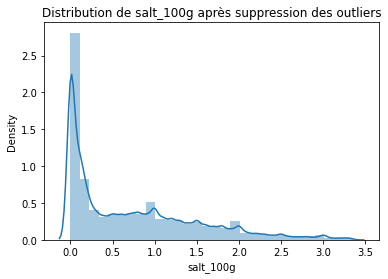

In [44]:
plt.title('Distribution de salt_100g après suppression des outliers')
sns.distplot(df_cleaned_percentiles['salt_100g'].dropna(),bins=30)

Text(0.5, 1.0, 'Méthode par percentiles')

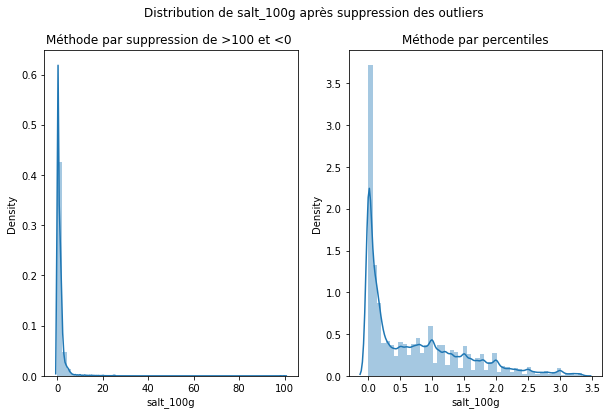

In [45]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de salt_100g après suppression des outliers")
ax1 = sns.distplot(df_cleaned_basic['salt_100g'].dropna(), ax=axes[0])
ax1.set_title("Méthode par suppression de >100 et <0 ")
ax2 = sns.distplot(df_cleaned_percentiles['salt_100g'].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

-   la suppression des outliers selon les quantiles peut fausser notre étude, donc on garde les outliers dans [0,100]

In [46]:
del df_cleaned_percentiles

>Pour chaque ligne dans le dataframe, la somme des indicateurs nutri ne doit pas dépasser les 100g.

In [47]:
list_col_indicateur_nutri

['sugars_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [48]:
#les colonnes que leurs somme ne doit pas dépassé 100
cols_to_sum=['fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g']

In [49]:
print('le nombre de ligne où la somme des indicateurs nutri (df_cleaned_basic) est > 100 = ',df_cleaned_basic[df_cleaned_basic[cols_to_sum].sum(axis=1) > 100].shape[0])

le nombre de ligne où la somme des indicateurs nutri (df_cleaned_basic) est > 100 =  83406


In [50]:
#supprimer tous les lignes où la somme des indicateurs nutri est > 100
df_cleaned_basic = df_cleaned_basic.drop(df_cleaned_basic[df_cleaned_basic[cols_to_sum].sum(axis=1) > 100].index)

In [51]:
nbr_ligne_colonne(df_cleaned_basic)

Nombre de lignes restants =  2437879
Nombre de colonnes restants =  26


Traitement des variable 'energy_100g' et 'energy-kcal_100g'

In [52]:
# caster le type de la variable 'energy_100g' en float64.
df_cleaned_basic['energy_100g'] = df_cleaned_basic['energy_100g'].astype(float)

In [53]:
df_cleaned_basic[['energy_100g','energy-kcal_100g']].isna().mean(axis=0)

energy_100g        0.18373
energy-kcal_100g   0.20284
dtype: float64

le seuils des valeurs d'energies en général [0,3770]KJ

In [54]:
print('le nombre de ligne avec des valeurs d\'energie > 3770 KJ est ',df_cleaned_basic['energy_100g'][df_cleaned_basic['energy_100g'] > 3770].count().sum())
print('le nombre de ligne avec des valeurs d\'energie < 0 KJ est ',df_cleaned_basic['energy_100g'][df_cleaned_basic['energy_100g'] < 0].count().sum())


le nombre de ligne avec des valeurs d'energie > 3770 KJ est  5877
le nombre de ligne avec des valeurs d'energie < 0 KJ est  3


In [55]:
def delete_outliers_energy_KJ(df,column):
    '''Suppression des outliers du centile extrême'''
    dataframe = df.copy()   
    for col in column:
        print('le nombre d\'outliers à traiter pour la colonne',col,'est {}'.format(dataframe[(dataframe[col] > 3760)|(dataframe[col] < 0)].count().sum()))
        dataframe.loc[dataframe[(dataframe[col] > 3770)|(dataframe[col] < 0)].index, col] = np.nan
    return dataframe

In [56]:
def delete_outliers_energy_Kcal(df,column):
    '''Suppression des outliers du centile extrême'''
    dataframe = df.copy()   
    for col in column:
        print('le nombre d\'outliers à traiter pour la colonne',col,'est {}'.format(dataframe[(dataframe[col] > 2700)|(dataframe[col] < 0)].count().sum()))
        dataframe.loc[dataframe[(dataframe[col] > 2700)|(dataframe[col] < 0)].index, col] = np.nan
    return dataframe

In [57]:
df_cleaned_basic = delete_outliers_energy_KJ(df_cleaned_basic,['energy_100g'])

le nombre d'outliers à traiter pour la colonne energy_100g est 231447


In [58]:
df_cleaned_basic = delete_outliers_energy_Kcal(df_cleaned_basic,['energy-kcal_100g'])

le nombre d'outliers à traiter pour la colonne energy-kcal_100g est 5191


In [59]:
df_cleaned_basic[['energy_100g','energy-kcal_100g']].isna().mean(axis=0)

energy_100g        0.18614
energy-kcal_100g   0.20302
dtype: float64

La varible 'energy_100g' est mieux rempli que la variable 'energy-kcal_100g', On décide de garder la variable 'energy_100g' pour le reste de ce travail

> la corrélation linéaire des variables quantitatives 

In [60]:
df_cleaned_basic[['salt_100g','sodium_100g']].isna().mean(axis=0)

salt_100g     0.27490
sodium_100g   0.27473
dtype: float64

In [61]:
df_cleaned_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437879 entries, 1277899 to 1927742
Data columns (total 26 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_name               object 
 1   brands                     object 
 2   categories                 object 
 3   countries_en               object 
 4   ingredients_text           object 
 5   ingredients_analysis_tags  object 
 6   additives_n                float64
 7   nutriscore_score           float64
 8   nutriscore_grade           object 
 9   pnns_groups_1              object 
 10  pnns_groups_2              object 
 11  food_groups                object 
 12  ecoscore_grade             object 
 13  nutrient_levels_tags       object 
 14  completeness               float64
 15  main_category_en           object 
 16  energy-kcal_100g           float64
 17  energy_100g                float64
 18  fat_100g                   float64
 19  saturated-fat_100g         float64
 

In [62]:
var_quantitative = ['nutriscore_score','additives_n','completeness','energy-kcal_100g','energy_100g','fat_100g',
                    'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g',
                   'proteins_100g','salt_100g','sodium_100g']

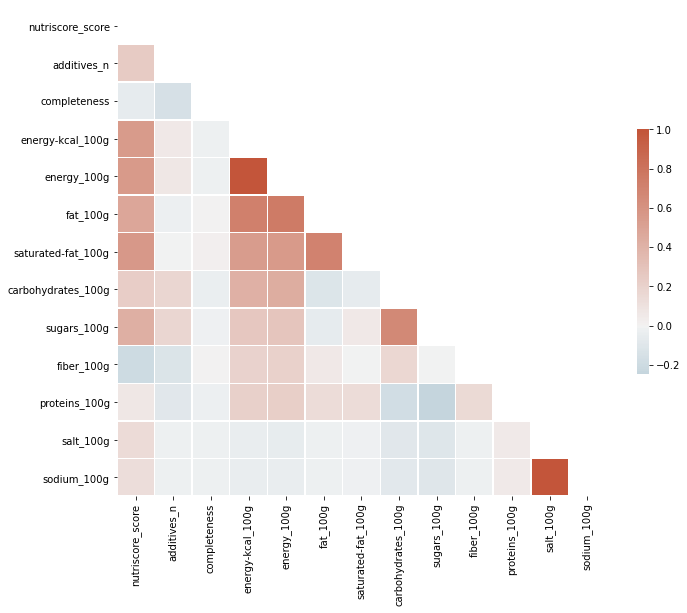

In [63]:
corr = df_cleaned_basic[var_quantitative].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Observations: 
- forte correlation entre 'energy-kcal_100g'et'energy_100g' donc on supprime la variable qui a le + de Nan ; c'est à dire: energy-kcal_100g. 
- forte correlation entre 'salt_100g' et'sodium_100g' , et comme le sodium est un des composante du sel on décide de supprimer la variable sodium_100g. 


In [64]:
df_cleaned_basic = df_cleaned_basic.drop('energy-kcal_100g', axis=1)

In [65]:
df_cleaned_basic = df_cleaned_basic.drop('sodium_100g', axis=1)

il faut supprimer les lignes avec trop de valeurs manquantes avant de commencer le traitement de ces derniers

In [66]:
nbr_ligne_colonne(df_cleaned_basic)

Nombre de lignes restants =  2437879
Nombre de colonnes restants =  24


> Après le traitement des outliers, il faut supprimer les lignes qui ont beaucoup de valeurs manquantes.  

In [67]:
#supprimer les lignes qui ont au moin : 12 valeur nan
df_cleaned_basic.dropna(thresh=12,inplace=True)

In [68]:
nbr_ligne_colonne(df_cleaned_basic)

Nombre de lignes restants =  2012228
Nombre de colonnes restants =  24


In [69]:
df_cleaned_basic.describe()

,additives_n,nutriscore_score,completeness,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,719053.00000,790901.00000,2012228.00000,1956010.00000,1959184.00000,1911146.00000,1958855.00000,1937384.00000,808056.00000,1960239.00000,1749953.00000
mean,2.03726,9.11681,0.46681,1093.81690,12.94811,4.85472,27.35228,12.76763,2.63473,8.48738,1.33299
std,2.90306,8.63760,0.20128,782.12915,17.06736,7.59987,27.51267,19.11944,4.53257,10.06359,4.25615
min,0.00000,-15.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,2.00000,0.27500,406.00000,0.60000,0.10000,3.53000,0.60000,0.00000,1.20000,0.10000
50%,1.00000,10.00000,0.40000,1039.00000,6.40000,1.70000,14.90000,3.57000,1.33333,5.80000,0.60000
75%,3.00000,16.00000,0.57500,1628.00000,20.00000,6.70000,51.40000,16.66667,3.40000,12.00000,1.40000
max,40.00000,40.00000,1.10000,3770.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000


## Traitement des Valeurs manquantes

### Imputation avec une valeur constante

In [70]:
col_qualitative

['product_name',
 'brands',
 'categories',
 'countries_en',
 'ingredients_text',
 'ingredients_analysis_tags',
 'pnns_groups_1',
 'pnns_groups_2',
 'nutriscore_grade',
 'ecoscore_grade',
 'food_groups',
 'nutrient_levels_tags',
 'main_category_en']

Remplaçons les valeurs manquantes des 'catégories','product_name', et 'countries_en' par la valeur "unknown" au lieu de "NaN"

In [71]:
df_cleaned_basic["categories"].fillna("unknown", inplace=True)

In [72]:
df_cleaned_basic["product_name"].fillna("unknown", inplace=True)

In [73]:
df_cleaned_basic["countries_en"].fillna("unknown", inplace=True)

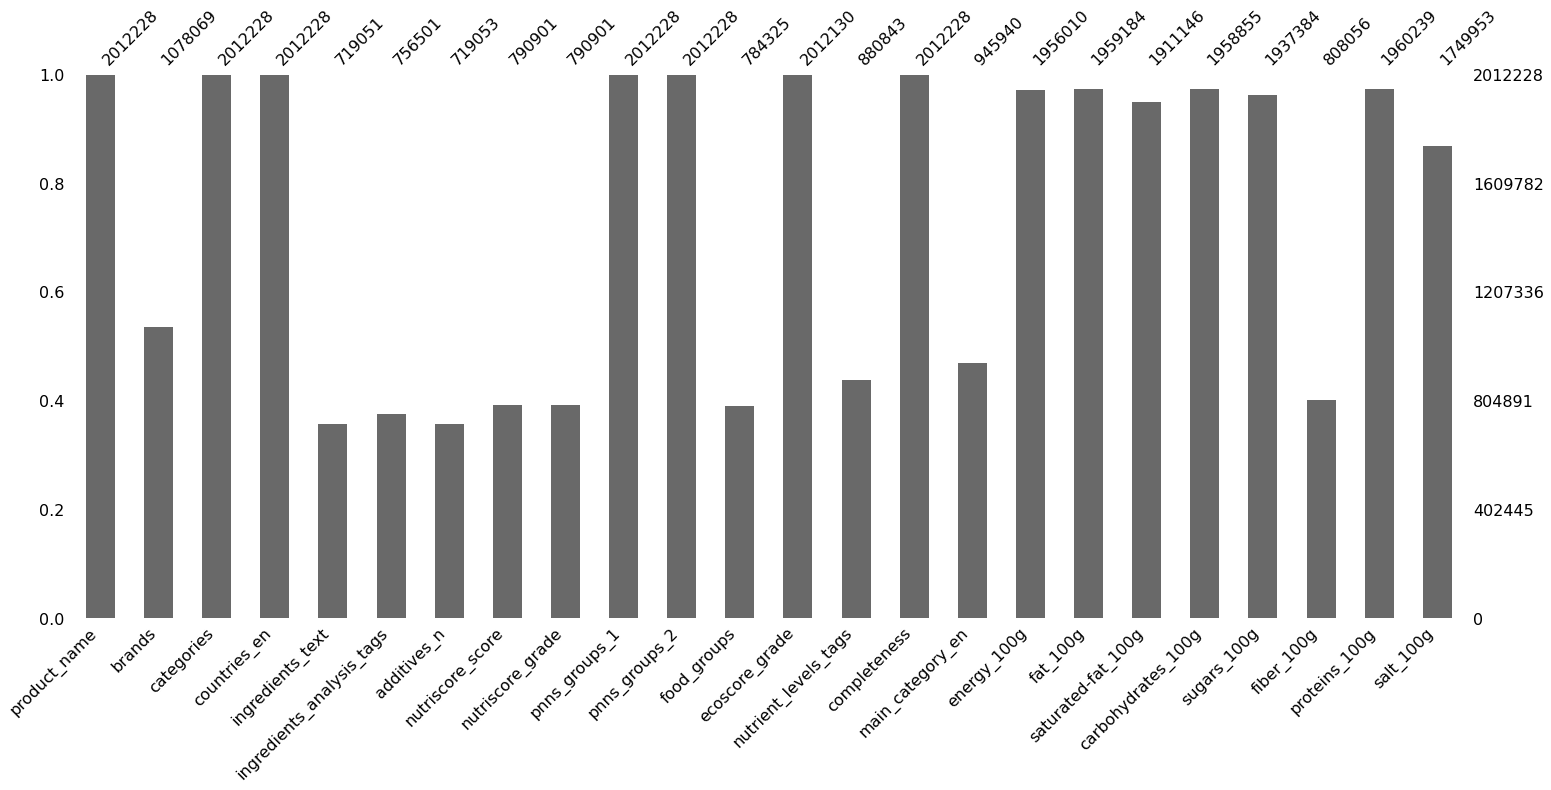

In [74]:
msno.bar(df_cleaned_basic)

### Imputation avec le mode

In [75]:
col_qualitative_keep = [ # delete nutriscore_grade et ecoscore_grade
 'brands',
 'ingredients_text',
 'ingredients_analysis_tags',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups',
 'nutrient_levels_tags',
 'main_category_en']

In [76]:
df_imput_mode = df_cleaned_basic.copy()
for cat in col_qualitative_keep: 
    df_imput_mode[cat].fillna(df_cleaned_basic[cat].mode()[0], inplace=True)

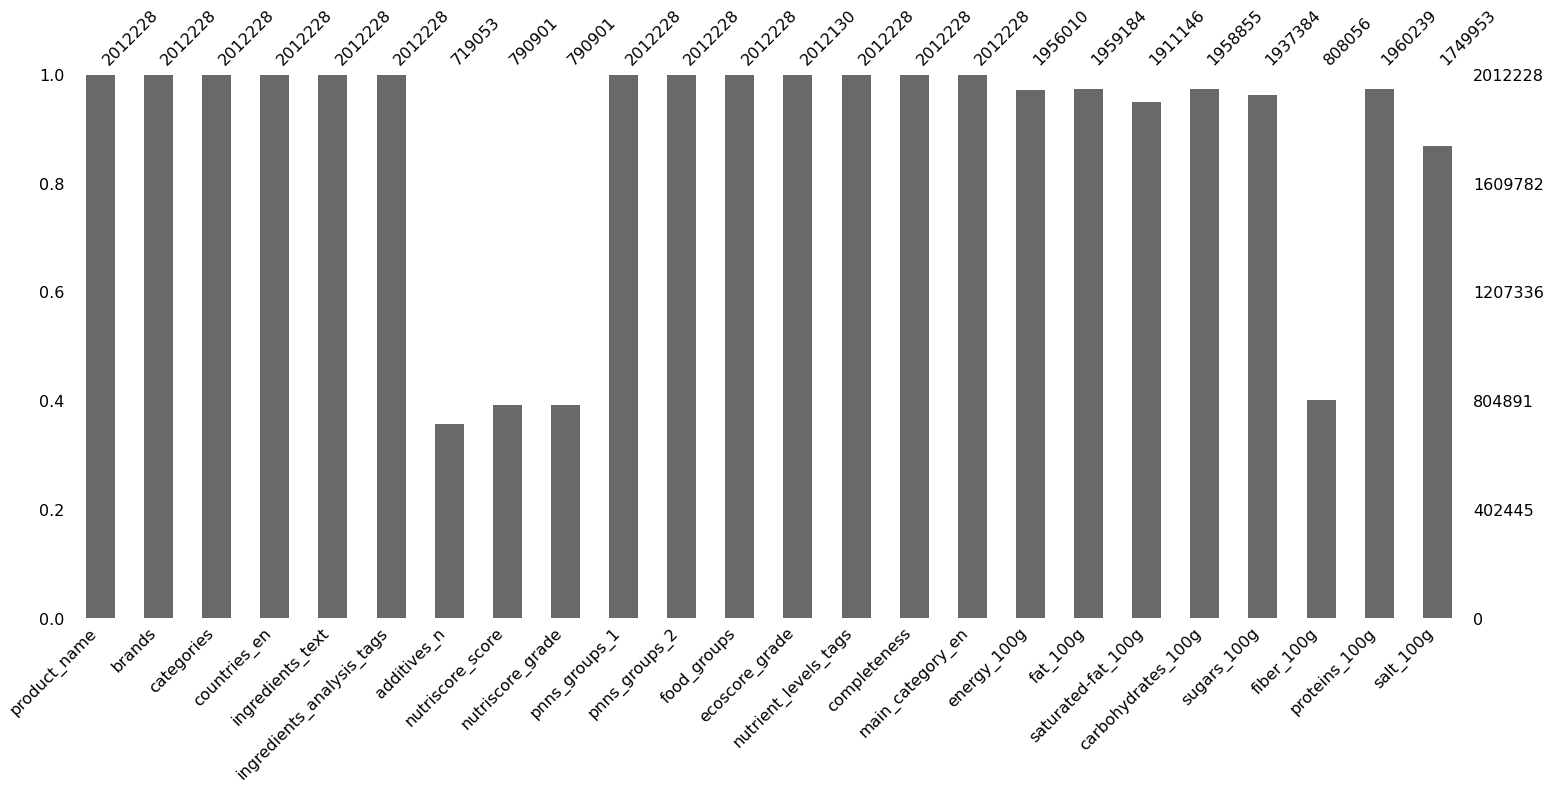

In [77]:
msno.bar(df_imput_mode)

In [78]:
nbr_ligne_colonne(df_imput_mode)

Nombre de lignes restants =  2012228
Nombre de colonnes restants =  24


On observe que tous les variables qualitatives sont rempli à 100% . 

### Imputation avec  IterativeImputer 

In [79]:
#del df_cleaned_basic

In [80]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [81]:
var_quantitative

['nutriscore_score',
 'additives_n',
 'completeness',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [82]:
var_quantitative_keep = [ 'additives_n', # delete nutri_score
 'completeness',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

In [83]:
imp_mean = IterativeImputer(min_value=0,max_value=100)

In [84]:
imputed = imp_mean.fit_transform(df_imput_mode[var_quantitative_keep])

In [85]:
df_imputed = pd.DataFrame(imputed, columns=var_quantitative_keep)

In [86]:
df_imputed.isna().mean(axis=0)

additives_n          0.00000
completeness         0.00000
energy_100g          0.00000
fat_100g             0.00000
saturated-fat_100g   0.00000
carbohydrates_100g   0.00000
sugars_100g          0.00000
fiber_100g           0.00000
proteins_100g        0.00000
salt_100g            0.00000
dtype: float64

In [87]:
extracted_col = df_imput_mode[col_qualitative_keep+['categories','product_name','countries_en',
                                                    'nutriscore_score','nutriscore_grade','ecoscore_grade']]

In [88]:
extracted_col = extracted_col.reset_index()

In [89]:
df_imputed = pd.concat([df_imputed, extracted_col],axis=1)


In [90]:
df_imputed.isna().mean(axis=0)

additives_n                 0.00000
completeness                0.00000
energy_100g                 0.00000
fat_100g                    0.00000
saturated-fat_100g          0.00000
carbohydrates_100g          0.00000
sugars_100g                 0.00000
fiber_100g                  0.00000
proteins_100g               0.00000
salt_100g                   0.00000
index                       0.00000
brands                      0.00000
ingredients_text            0.00000
ingredients_analysis_tags   0.00000
pnns_groups_1               0.00000
pnns_groups_2               0.00000
food_groups                 0.00000
nutrient_levels_tags        0.00000
main_category_en            0.00000
categories                  0.00000
product_name                0.00000
countries_en                0.00000
nutriscore_score            0.60695
nutriscore_grade            0.60695
ecoscore_grade              0.00005
dtype: float64

In [91]:
df_imputed = df_imputed.drop(['index'], axis=1)

In [92]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012228 entries, 0 to 2012227
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   additives_n                float64
 1   completeness               float64
 2   energy_100g                float64
 3   fat_100g                   float64
 4   saturated-fat_100g         float64
 5   carbohydrates_100g         float64
 6   sugars_100g                float64
 7   fiber_100g                 float64
 8   proteins_100g              float64
 9   salt_100g                  float64
 10  brands                     object 
 11  ingredients_text           object 
 12  ingredients_analysis_tags  object 
 13  pnns_groups_1              object 
 14  pnns_groups_2              object 
 15  food_groups                object 
 16  nutrient_levels_tags       object 
 17  main_category_en           object 
 18  categories                 object 
 19  product_name               object 
 20  co

In [93]:
df_imputed.shape

(2012228, 24)

In [94]:
#supprimer tous les lignes où la somme des indicateurs nutri est > 100 après imputation
df_imputed = df_imputed.drop(df_imputed[df_imputed[cols_to_sum].sum(axis=1) > 100].index)

In [95]:
df_imputed.shape

(1965242, 24)

In [96]:
df_imputed.describe()

,additives_n,completeness,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_score
count,1965242.00000,1965242.00000,1965242.00000,1965242.00000,1965242.00000,1965242.00000,1965242.00000,1965242.00000,1965242.00000,1965242.00000,778560.00000
mean,2.29290,0.46812,1038.93214,12.18327,4.60092,26.13126,12.15535,2.53651,8.39954,1.34342,9.03332
std,1.84652,0.20188,767.67859,16.11298,7.37649,26.78672,18.32569,3.05302,9.73965,3.97992,8.62570
min,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-15.00000
25%,1.52047,0.27500,345.00000,0.50000,0.10000,3.57000,0.60000,1.07542,1.30000,0.11000,1.00000
50%,2.19778,0.40000,975.00000,5.71000,1.50000,13.60000,3.40000,2.10000,5.88235,0.77458,10.00000
75%,2.89392,0.57500,1582.00000,19.00000,6.16740,50.00000,15.00000,3.22691,12.00000,1.52400,16.00000
max,40.00000,1.10000,3770.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,40.00000


In [97]:
df_imputed.isna().mean(axis=0)

additives_n                 0.00000
completeness                0.00000
energy_100g                 0.00000
fat_100g                    0.00000
saturated-fat_100g          0.00000
carbohydrates_100g          0.00000
sugars_100g                 0.00000
fiber_100g                  0.00000
proteins_100g               0.00000
salt_100g                   0.00000
brands                      0.00000
ingredients_text            0.00000
ingredients_analysis_tags   0.00000
pnns_groups_1               0.00000
pnns_groups_2               0.00000
food_groups                 0.00000
nutrient_levels_tags        0.00000
main_category_en            0.00000
categories                  0.00000
product_name                0.00000
countries_en                0.00000
nutriscore_score            0.60384
nutriscore_grade            0.60384
ecoscore_grade              0.00005
dtype: float64

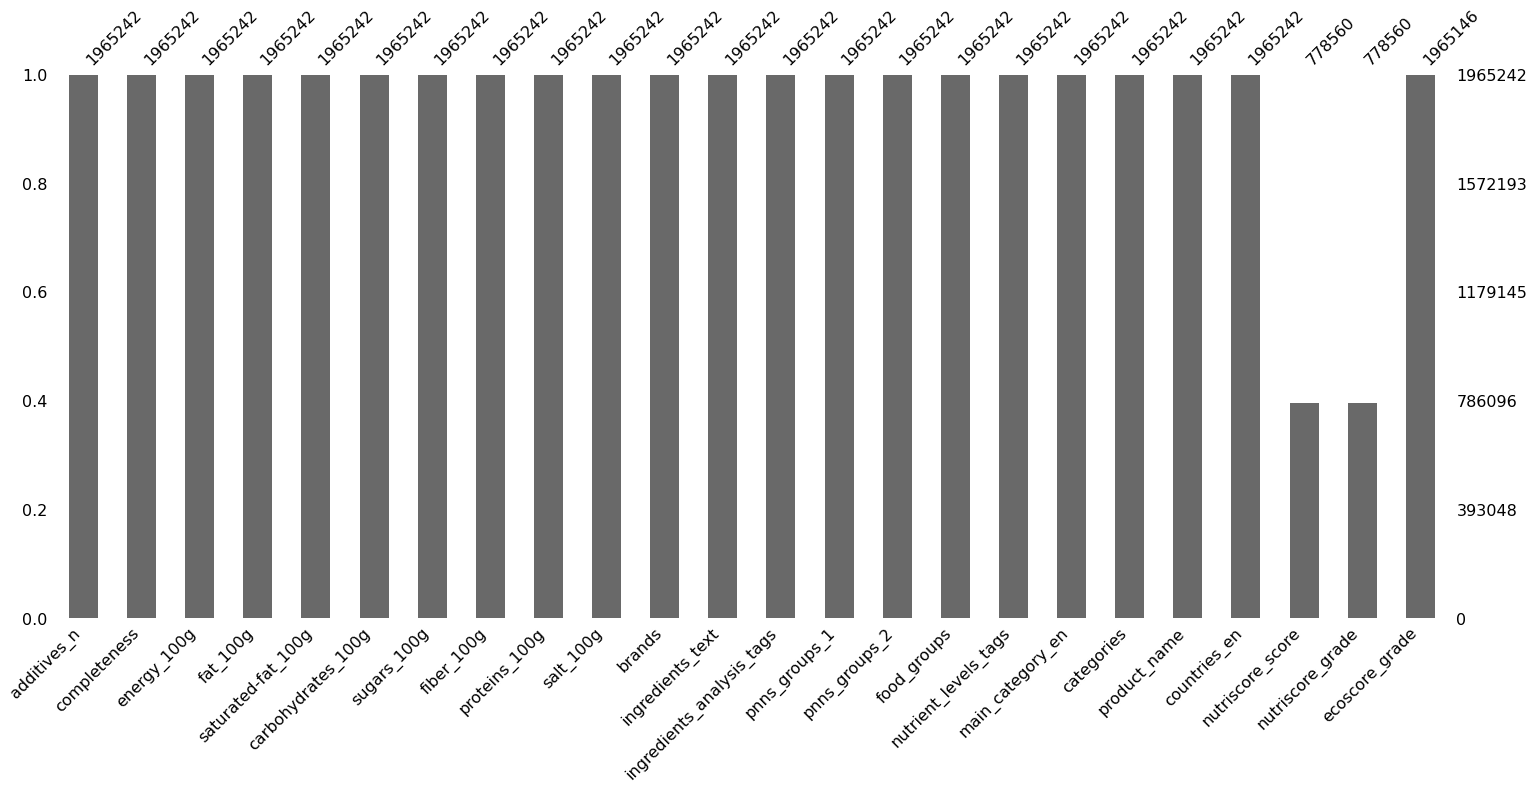

In [98]:
msno.bar(df_imputed)

In [99]:
df_imputed=df_imputed.reset_index()

In [100]:
df_imputed = df_imputed.drop(['index'], axis=1)

In [101]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965242 entries, 0 to 1965241
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   additives_n                float64
 1   completeness               float64
 2   energy_100g                float64
 3   fat_100g                   float64
 4   saturated-fat_100g         float64
 5   carbohydrates_100g         float64
 6   sugars_100g                float64
 7   fiber_100g                 float64
 8   proteins_100g              float64
 9   salt_100g                  float64
 10  brands                     object 
 11  ingredients_text           object 
 12  ingredients_analysis_tags  object 
 13  pnns_groups_1              object 
 14  pnns_groups_2              object 
 15  food_groups                object 
 16  nutrient_levels_tags       object 
 17  main_category_en           object 
 18  categories                 object 
 19  product_name               object 
 20  co

In [102]:
df_imputed.to_feather("cleaned_data_1.feather")